<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Text_Mining(Assignment1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are given with the Elon musk tweets .
# We are required to do the sentimental analysis on the tweets.

In [ ]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.xlsx to Elon_musk.xlsx


In [ ]:
em = pd.read_csv('Elon_musk.csv',encoding='latin',error_bad_lines=False)

In [ ]:
em

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
em.drop(['Unnamed: 0'],axis=1)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk=em['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [ ]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [ ]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [ ]:
len(text_tokens)

21373

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [ ]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2705,232,2443,3621,4502,966,1680,3157,1675,4538,...,1082,3511,4257,3546,4039,2334,779,3824,1535,248


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2705
alien,232
idaacarmack,2443
ray,3621
trace,4502
...,...
httpstcowjrzibkh1h,2334
click,779
samwise,3824
gamgee,1535


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
ðogecoin,4974
zzcool,4973
zwiebelbach,4972
zubinanary,4971
zshauladventure,4970
zone,4969
zon,4968
zogfotpik,4967
zip2,4966
zikryzamir,4965


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [ ]:
print(vectorizer.vocabulary_)

{'kunalb11': 2705, 'alien': 232, 'idaacarmack': 2443, 'ray': 3621, 'trace': 4502, 'cyberpunk': 966, 'hdr': 1680, 'nextlevel': 3157, 'have': 1675, 'try': 4538, 'joerogan': 2625, 'spotify': 4119, 'great': 1615, 'interview': 2554, 'gtera27': 1634, 'doge': 1117, 'underestimate': 4671, 'teslacn': 4347, 'congratulations': 862, 'tesla': 4341, 'china': 745, 'amazing': 258, 'execution': 1330, 'last': 2724, 'year': 4941, 'now': 3197, 'next': 3156, 'even': 1302, 'happy': 1662, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1869, 'frodo': 1498, 'underdoge': 4670, 'all': 235, 'thought': 4426, 'would': 4917, 'fail': 1366, 'himself': 1724, 'httpstcozgxjfdzzrm': 2402, 'owensparks': 3311, 'flcnhvy': 1440, 'anonyx10': 287, 'haha': 1648, 'thank': 4384, 'indeed': 2492, 'tweets': 4561, 'definitely': 1021, 'represent': 3705, 'realworld': 3646, 'time': 4445, 'allocation': 237, 'the': 4392, 'entertaining': 1258, 'outcome': 3290, 'likely': 2786, 'givedirectly': 1585, 'just': 2653, 'send': 3892, 'agree': 201, '

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names_out()[1:20])

{'kunalb11': 2612, 'alien': 233, 'idaacarmack': 2377, 'ray': 3462, 'trace': 4300, 'cyberpunk': 933, 'hdr': 1620, 'nextlevel': 3041, 'have': 1615, 'tri': 4318, 'joerogan': 2534, 'spotifi': 3937, 'great': 1552, 'interview': 2465, 'gtera27': 1571, 'doge': 1075, 'underestim': 4463, 'teslacn': 4151, 'congratul': 835, 'tesla': 4145, 'china': 724, 'amaz': 257, 'execut': 1273, 'last': 2630, 'year': 4725, 'now': 3080, 'next': 3040, 'even': 1249, 'happi': 1601, 'new': 3037, 'ox': 3184, 'httpstco9wfkmyu2oj': 1805, 'frodo': 1438, 'underdog': 4462, 'all': 235, 'thought': 4226, 'would': 4701, 'fail': 1308, 'himself': 1664, 'httpstcozgxjfdzzrm': 2338, 'owenspark': 3181, 'flcnhvi': 1377, 'anonyx10': 287, 'haha': 1587, 'thank': 4185, 'inde': 2422, 'tweet': 4352, 'definit': 986, 'repres': 3535, 'realworld': 3486, 'time': 4243, 'alloc': 236, 'the': 4192, 'entertain': 1208, 'outcom': 3161, 'like': 2687, 'givedirectli': 1518, 'just': 2561, 'sent': 3720, 'agre': 204, 'clubhous': 766, 'kanyewest': 2570, 'htt

In [ ]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(X.toarray().shape)

(15946, 4756)


In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l1",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [ ]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

['0001f923' '0001f923 0001f923' 'about' 'all' 'also' 'amp' 'an' 'and'
 'are' 'as' 'at' 'be' 'but' 'by' 'can' 'cleantechnica' 'co' 'do' 'dragon'
 'erdayastronaut' 'first' 'flcnhvy' 'for' 'from' 'good' 'great' 'haha'
 'has' 'have' 'he' 'high' 'https' 'https co' 'id_aa_carmack' 'if' 'in'
 'in the' 'is' 'it' 'just' 'kristennetten' 'launch' 'like' 'make'
 'marcushousegame' 'more' 'most' 'much' 'my' 'nasa' 'nasaspaceflight'
 'need' 'new' 'no' 'not' 'of' 'of the' 'on' 'one' 'or' 'our' 'out'
 'people' 'ppathole' 'probably' 'rationaletienne' 're' 'rt' 'rt spacex'
 'should' 'so' 'some' 'spacex' 'starship' 'sure' 'tesla' 'teslaownerssv'
 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this' 'this is' 'to'
 'too' 'true' 'was' 'we' 'what' 'wholemarsblog' 'will' 'will be' 'with'
 'would' 'yeah' 'year' 'yes' 'you']


In [ ]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.14870864]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

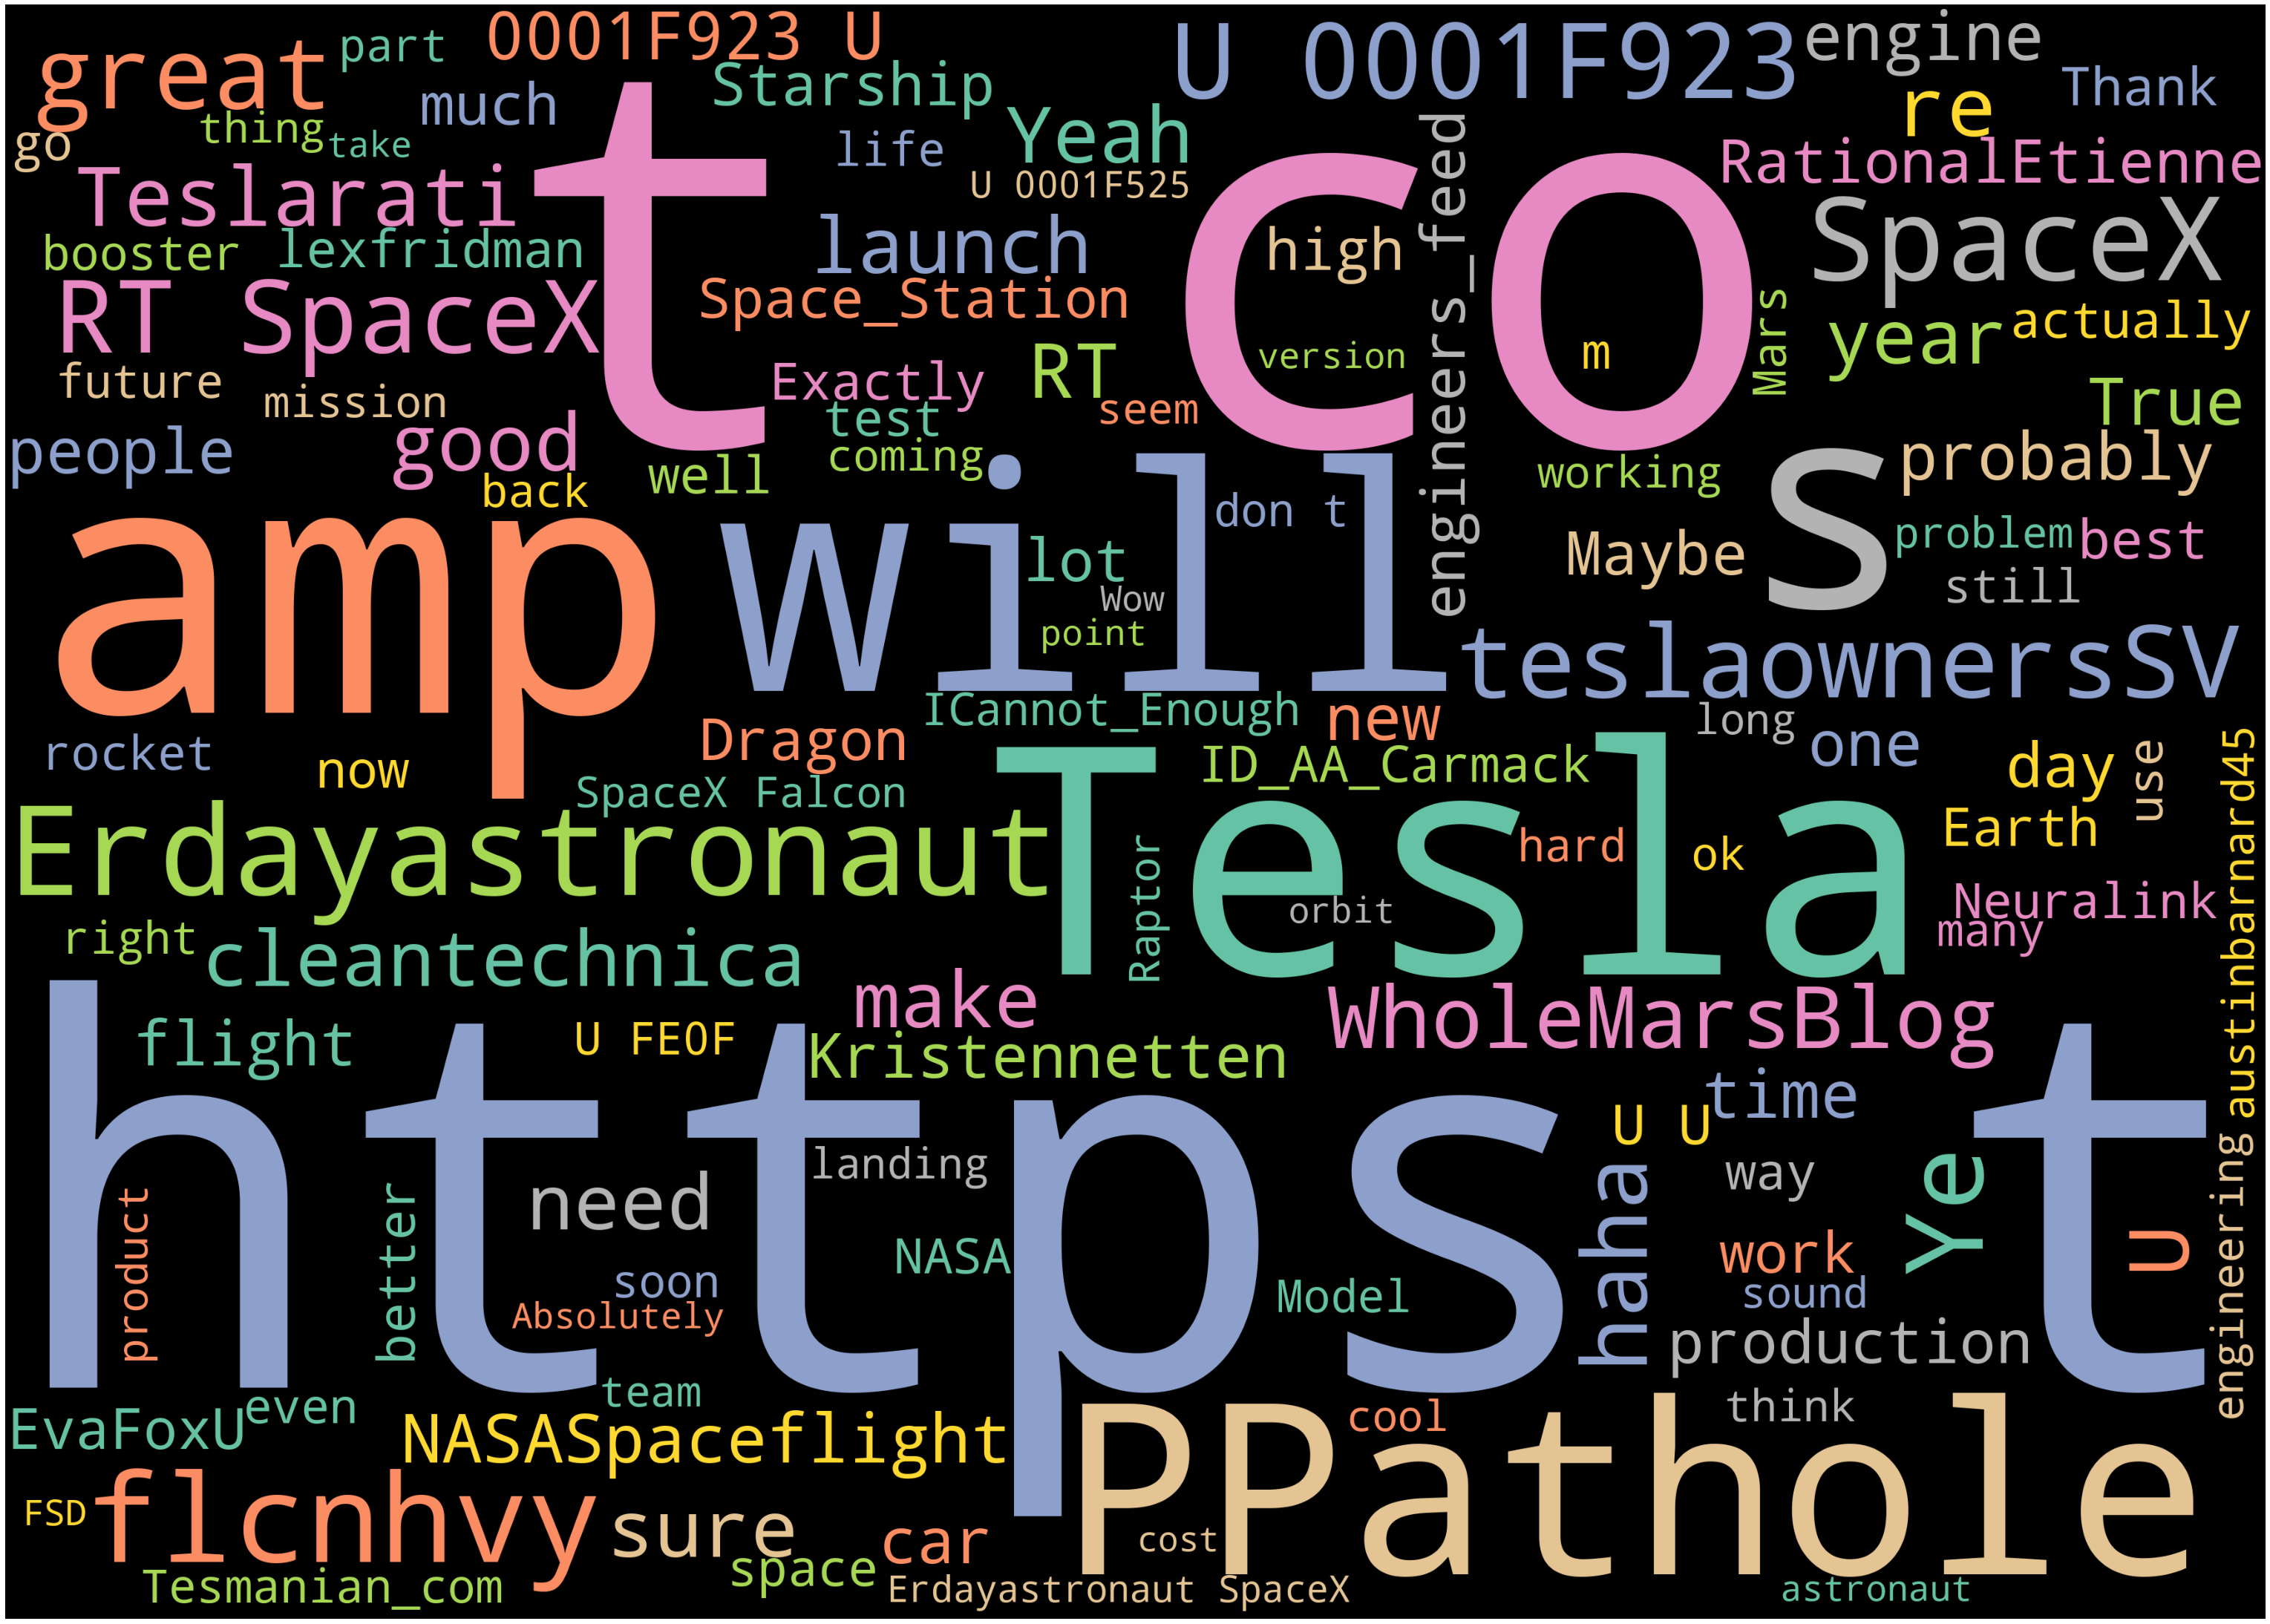

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [ ]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [ ]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [ ]:
len(nouns_verbs)

3

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(3, 3)

In [ ]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [ ]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [ ]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]])

In [ ]:
type(sum_words)

numpy.matrix

In [ ]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [ ]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [ ]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,level,1
1,tracing,1
2,tried,1


**Visualization**

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

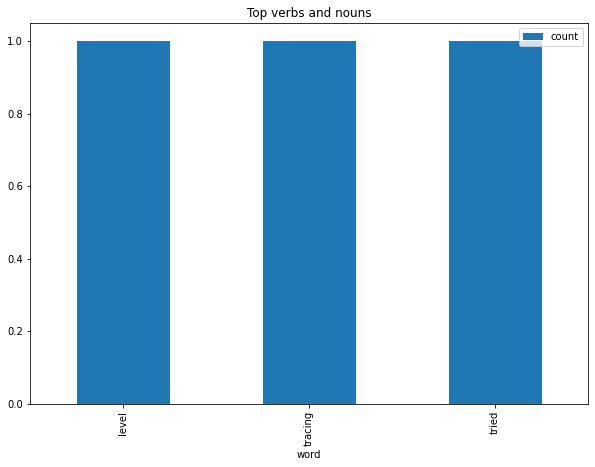

In [ ]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

In [ ]:
#Sentiment analysis

In [ ]:
# Loading Affine Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
import pandas as pd
k = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')

k

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
k[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk2))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
affinity_scores = k.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [ ]:
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [ ]:
calculate_sentiment(text = 'wonderful session')

4

In [ ]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [ ]:
calculate_sentiment(text = 'good')

3

In [ ]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [ ]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [ ]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
159,@harsimranbansal @heydave7 It will most likely...,11,93
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [ ]:
sent_df.sort_values(by='sentiment_value').head(15)

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
744,@TimFernholz So why is this madness acceptable...,-3,10
380,No problem if theres a way get current design...,-3,13
219,@RGVaerialphotos It will be real soon @MarcusH...,-3,18


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [ ]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61


In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [ ]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

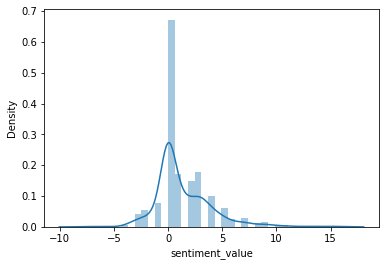

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

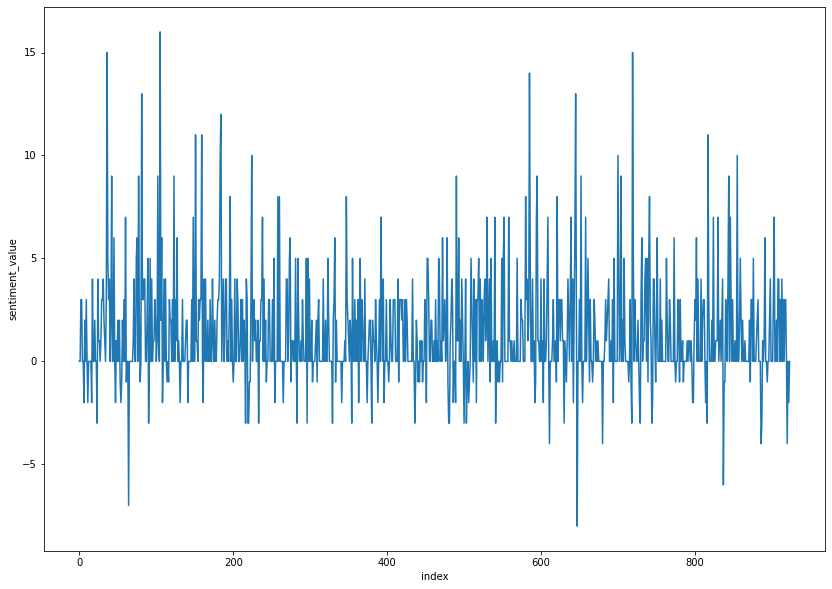

In [ ]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

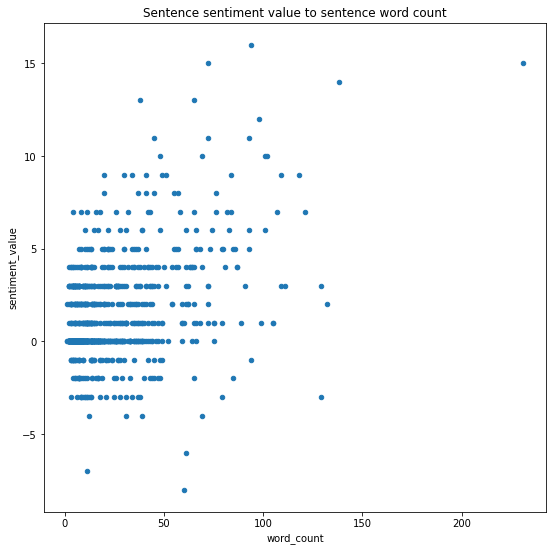

In [ ]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [ ]:
# PW for positive words 
# NW for Negative Words 

In [ ]:
# Loading Positive words

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [ ]:
# Negative Words

In [ ]:
# Load Negative Words

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words.txt


In [ ]:
import pandas as pd
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [ ]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [ ]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [ ]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [ ]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65,371
580,"T https://t.co/DyNlT5EKGk @Model3Owners Fine,...",5,37,580
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94,105
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231,36
652,"Its not useful for predicting the future, nor...",9,118,652


In [ ]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,647
886,This is primarily an electrical/electronic (ch...,-4,69,886
329,"Their main PCR search is for the N1 gene, uniq...",-3,28,329
363,4D is essential for dynamically occluded objec...,-3,45,363
156,We couldnt get everything done in https://t....,-3,65,156


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       0.456710
std        1.250468
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count,index
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14,6
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-1,40,11
16,Thats what youre missing.,-1,4,16
23,https://t.co/UEEocOfcTb The people have spoken...,-1,37,23
30,The Second Last Kingdom https://t.co/Je4EI88Hm...,-1,38,30


In [ ]:
sent_df[sent_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
55,You https://t.co/6gO7EHq9qy @avalonpenrose A ...,-2,30,55
64,"Also, the road to hell is mostly paved with ba...",-2,11,64
67,Only o https://t.co/CeoFLi8Lzm @Megaconstella...,-2,39,67
156,We couldnt get everything done in https://t....,-3,65,156
200,Fuel header tank pressure was low during landi...,-2,35,200
219,@RGVaerialphotos It will be real soon @MarcusH...,-2,18,219
220,External https://t.co/csIZk6sEVu @bcart03 @ne...,-2,31,220
240,@RationalEtienne @ShyCybertruck Fate loves iro...,-2,42,240
296,"No symptoms for past few days, apart from fati...",-2,9,296
304,"Last week, I had sym https://t.co/gL0mhrqJxY ...",-2,41,304


In [ ]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
67     Only o
 https://t.co/CeoFLi8Lzm @Megaconstella...
156    We couldnt get everything done in
 https://t....
200    Fuel header tank pressure was low during landi...
219    @RGVaerialphotos It will be real soon @MarcusH...
220    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
240    @RationalEtienne @ShyCybertruck Fate loves iro...
296    No symptoms for past few days, apart from fati...
304    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
329    Their main PCR search is for the N1 gene, uniq...
363    4D is essential for dynamically occluded objec...
374    The Model 3 ramp was extreme stress &amp; pa
 ...
391    Transferring propellant
 https://t.co/vPIIPpDV...
436    @SpaceX Just a small-seeming issue with loss o...
525    Hollywood should just start with the sequel &a...
564    @podcastnotes Genetic engineering is too slow ...
611    Then static fire, checko

In [ ]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'Only o\x85 https://t.co/CeoFLi8Lzm @Megaconstellati @Aviation_Intel @jetcitystar @larrypress Yup @TeslaGong @teslaownersSV @cleantechnica I hope so @Tesmanian_com These also have laser links between the satellites, so no ground stations are needed over the poles @teslaownersSV @cleantechnica Sorry for the version confusion.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @AfloatHickory Haha I will save you the nightmare of seeing me in those shorts @h3_extrachars You can upload custom music/sounds @jgrano305 Unfortunately, pedestrian speaker is needed, otherwise no external sound generator except actual horn Change your horn sound

In [ ]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

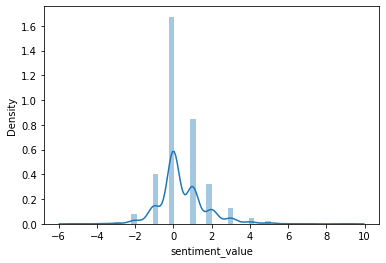

In [ ]:
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

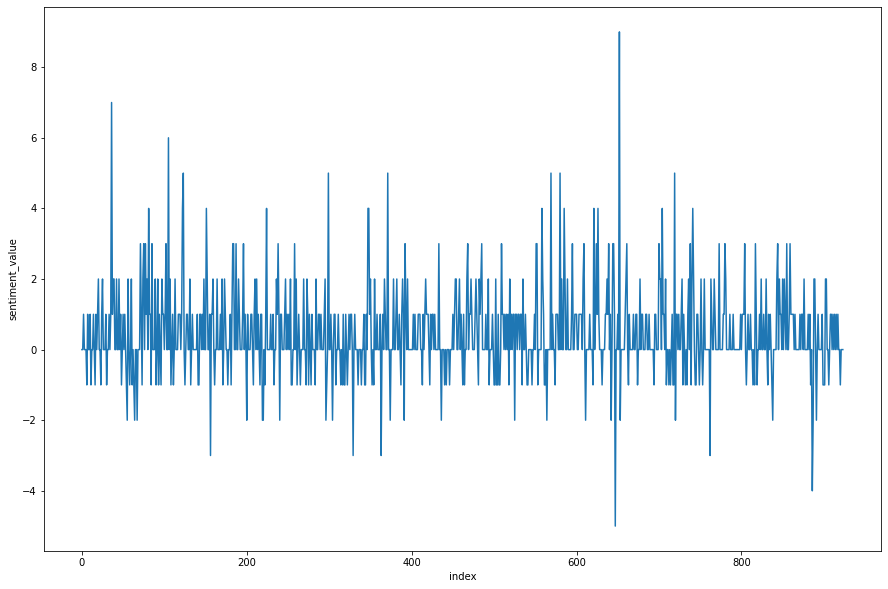

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

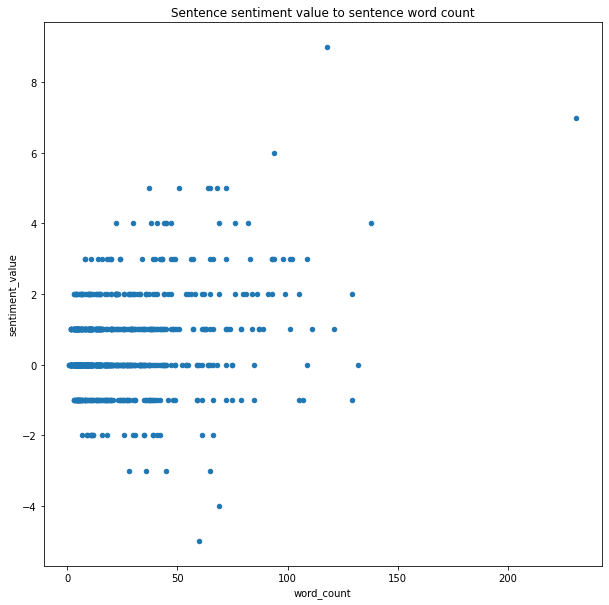

In [ ]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')

Conclusion:

Positive and Negative words can't give us better results for sentimental analysis as compared to rohu(afinn dataset) which gives us better analysis.